<h2 align="center">Automatic Machine Learning with H2O AutoML</h2>

### Task 2: Importing Packages

In [1]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt

### Task 3: Loading and Exploring the Data

In [2]:
xls = pd.ExcelFile('data/bank_term_deposit_marketing_analysis.xlsx')

In [3]:
xls.sheet_names

['PROCEDURE',
 'DATA DESCRIPTION',
 'Step 1 - Collect Information',
 'CLIENT_INFO',
 'LOAN_HISTORY',
 'MARKETING HISTORY',
 'SUBSCRIPTION HISTORY',
 'Step 2 - Merge Information',
 'CLIENT_MERGE',
 'Step 3 - Marketing Analysis',
 'DAILY RANGE',
 'JOB ANALYSIS',
 'Sheet3']

In [4]:
client_info = pd.read_excel(xls, 'CLIENT_INFO')
loan_history = pd.read_excel(xls, 'LOAN_HISTORY')
marketing_history = pd.read_excel(xls, 'MARKETING HISTORY')
subscription_history = pd.read_excel(xls, 'SUBSCRIPTION HISTORY')


In [5]:
client_info.head()

,ID,AGE,JOB,MARITAL,EDUCATION
0,2836,58,management,married,tertiary
1,2837,44,technician,single,secondary
2,2838,33,entrepreneur,married,secondary
3,2839,47,blue-collar,married,unknown
4,2840,33,unknown,single,unknown


In [6]:
loan_history.head()

,ID,DEFAULT,BALANCE,HOUSING,LOAN
0,2836,no,2143,yes,no
1,2837,no,29,yes,no
2,2838,no,2,yes,yes
3,2839,no,1506,yes,no
4,2840,no,1,no,no


In [7]:
marketing_history.head()

,ID,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME
0,2836,unknown,5,may,261,1,-1,0,unknown
1,2837,unknown,5,may,151,1,-1,0,unknown
2,2838,unknown,5,may,76,1,-1,0,unknown
3,2839,unknown,5,may,92,1,-1,0,unknown
4,2840,unknown,5,may,198,1,-1,0,unknown


In [9]:
subscription_history.head()

,ID,TERM_DEPOSIT
0,2836,no
1,2837,no
2,2838,no
3,2839,no
4,2840,no


In [10]:
df = pd.merge(client_info, loan_history, on=['ID'])
df = pd.merge(df, marketing_history, on=['ID'])
df = pd.merge(df, subscription_history, on=['ID'])
df.head()

,ID,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,2836,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2837,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2838,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,2839,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,2840,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
df.drop(['ID'],axis=1,  inplace=True
       )

### Task 4: Data Prep & Start H2O

In [14]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /home/rhyme/.local/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpgt3pjx51
  JVM stdout: /tmp/tmpgt3pjx51/h2o_rhyme_started_from_python.out
  JVM stderr: /tmp/tmpgt3pjx51/h2o_rhyme_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,12 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.3
H2O_cluster_version_age:,4 months and 9 days !!!
H2O_cluster_name:,H2O_from_python_rhyme_383nce
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.920 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [15]:
h2o_df = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [18]:
h2o_df.describe()

Rows:45211
Cols:17




,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.93621021432807,,,,,1362.2720576850802,,,,15.806418791886923,,258.16307978146915,2.7638406582468997,40.19782796222158,0.5803233726305561,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.618762040975398,,,,,3044.7658291685216,,,,8.32247615304459,,257.52781226517124,3.0980208832791805,100.12874599059822,2.303441044931215,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


In [19]:
train, test = h2o_df.split_frame(ratios=[0.75])
x = train.columns
y = 'TERM_DEPOSIT'
x.remove(y)


### Task 5: Run H2O AutoML

In [20]:
from h2o.automl import H2OAutoML


In [21]:
df.TERM_DEPOSIT.value_counts()

no     39922
yes     5289
Name: TERM_DEPOSIT, dtype: int64

In [22]:
aml = H2OAutoML(max_runtime_secs=600, 
                balance_classes=True,
                stopping_metric='logloss',
                project_name='Final',
                seed=1
               )
%time aml.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%
CPU times: user 2min 20s, sys: 1.19 s, total: 2min 21s
Wall time: 9min 54s


### Task 6: AutoML Leaderboard and Ensemble Exploration

In [24]:
lb = aml.leaderboard
lb.head(lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20200923_183906,0.935433,0.218741,0.630756,0.163251,0.255124,0.0650885
StackedEnsemble_AllModels_AutoML_20200923_183906,0.934135,0.21276,0.625944,0.163419,0.253252,0.0641368
XGBoost_grid__1_AutoML_20200923_183906_model_2,0.933987,0.199507,0.62855,0.17254,0.25039,0.0626954
GBM_grid__1_AutoML_20200923_183906_model_1,0.932484,0.201002,0.614258,0.170645,0.251257,0.0631302
GBM_grid__1_AutoML_20200923_183906_model_2,0.93165,0.209025,0.618169,0.179834,0.256754,0.0659228
XGBoost_grid__1_AutoML_20200923_183906_model_1,0.930957,0.20494,0.60931,0.185238,0.253256,0.0641388
XGBoost_3_AutoML_20200923_183906,0.929184,0.206276,0.61516,0.169401,0.252785,0.0639003
XGBoost_grid__1_AutoML_20200923_183906_model_4,0.928166,0.216082,0.593748,0.177587,0.259948,0.067573
GBM_5_AutoML_20200923_183906,0.928043,0.251646,0.58794,0.176355,0.280943,0.0789288
XGBoost_grid__1_AutoML_20200923_183906_model_3,0.927263,0.212976,0.601439,0.176375,0.258511,0.066828


In [27]:
se = aml.leader
metalearner = h2o.get_model(se.metalearner()['name'])

In [28]:
metalearner.varimp()

[('GBM_grid__1_AutoML_20200923_183906_model_1',
  0.6751684838418257,
  1.0,
  0.4417375664194074),
 ('XGBoost_grid__1_AutoML_20200923_183906_model_2',
  0.6469847323870683,
  0.9582567135029957,
  0.4232979886278726),
 ('DRF_1_AutoML_20200923_183906',
  0.1263910862327519,
  0.18719932766050437,
  0.08269297543610046),
 ('XRT_1_AutoML_20200923_183906',
  0.04643075822490272,
  0.06876914331176072,
  0.03037791401128465),
 ('DeepLearning_grid__1_AutoML_20200923_183906_model_1',
  0.033462942253838515,
  0.049562358218245874,
  0.02189355550533485),
 ('GLM_1_AutoML_20200923_183906', 0.0, 0.0, 0.0)]

### Task 7: Base Learner XGBoost Model Exploration

In [29]:
model = h2o.get_model('GBM_grid__1_AutoML_20200923_183906_model_1')

In [30]:
model.model_performance(test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.06385841676486556
RMSE: 0.25270222944181864
LogLoss: 0.20285381081608544
Mean Per-Class Error: 0.1369911199376398
AUC: 0.9293997046507712
AUCPR: 0.5971231524573518
Gini: 0.8587994093015423

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.32533356610169756: 


,,no,yes,Error,Rate
0,no,9236.0,659.0,0.0666,(659.0/9895.0)
1,yes,428.0,862.0,0.3318,(428.0/1290.0)
2,Total,9664.0,1521.0,0.0972,(1087.0/11185.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.325334,0.613305,197.0
1,max f2,0.126182,0.722001,282.0
2,max f0point5,0.360516,0.594535,184.0
3,max accuracy,0.427920,0.906661,158.0
4,max precision,0.922436,0.875000,4.0
5,max recall,0.003376,1.000000,391.0
6,max specificity,0.947256,0.999899,0.0
7,max absolute_mcc,0.207572,0.566028,243.0
8,max min_per_class_accuracy,0.141007,0.857605,275.0
9,max mean_per_class_accuracy,0.078824,0.863009,313.0



Gains/Lift Table: Avg response rate: 11.53 %, avg score: 11.04 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010013,0.820729,6.657738,6.657738,0.767857,0.867215,0.767857,0.867215,0.066667,0.066667,565.773810,565.773810
1,,2,0.020027,0.755135,6.038414,6.348076,0.696429,0.785901,0.732143,0.826558,0.060465,0.127132,503.841362,534.807586
2,,3,0.030040,0.690322,6.580323,6.425491,0.758929,0.718011,0.741071,0.790376,0.065891,0.193023,558.032254,542.549142
3,,4,0.040054,0.627071,5.264258,6.135183,0.607143,0.659749,0.707589,0.757719,0.052713,0.245736,426.425803,513.518307
4,,5,0.050067,0.584955,5.419089,5.991964,0.625000,0.604495,0.691071,0.727074,0.054264,0.300000,441.908915,499.196429
5,,6,0.100045,0.422960,4.575689,5.284459,0.527728,0.503347,0.609473,0.615311,0.228682,0.528682,357.568887,428.445941
6,,7,0.150022,0.285806,3.474421,4.681473,0.400716,0.352792,0.539928,0.527857,0.173643,0.702326,247.442138,368.147296
7,,8,0.200000,0.179578,2.311111,4.089147,0.266547,0.228048,0.471614,0.452938,0.115504,0.817829,131.111065,308.914729
8,,9,0.300045,0.065611,1.170020,3.115815,0.134942,0.111734,0.359356,0.339169,0.117054,0.934884,17.001960,211.581479
9,,10,0.400000,0.027975,0.380015,2.432171,0.043828,0.043684,0.280510,0.265331,0.037984,0.972868,-61.998516,143.217054


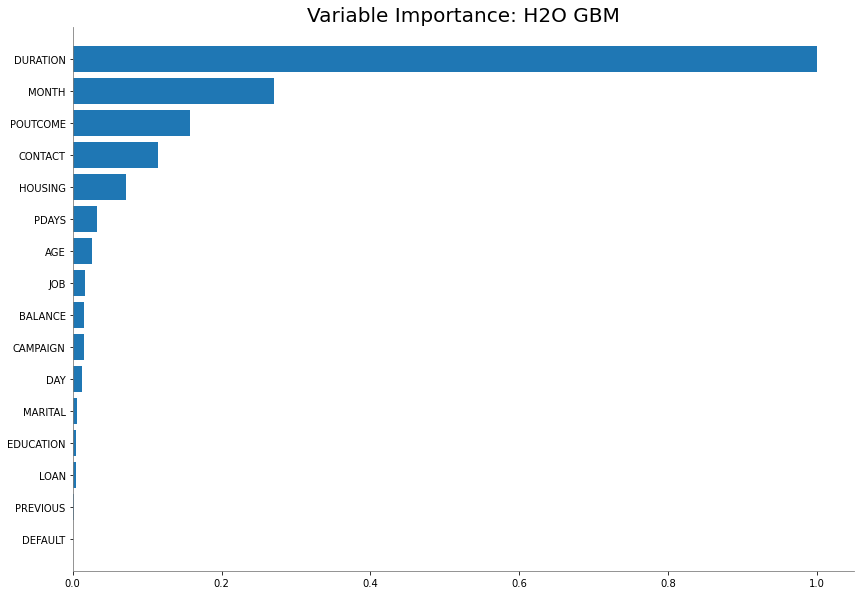

In [31]:
model.varimp_plot(num_of_features=20)